## **Pandas Introduction**

In [0]:
import pandas as pd

In [0]:
base_url = "https://gist.githubusercontent.com/alti-tude/710cb9d4dfc7ebcd0afb9cf93d8f6a8d/raw/574730ba009e69b81d6c79f2fef2c3dd5145db0a/"

In [4]:
music_df=pd.read_csv(base_url+"MusicTop50.csv",index_col=0)
music_df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
1,Se�orita,Shawn Mendes,canadian pop,117.0,55.0,76,-6,8.0,75.0,191.0,4,3,79.0
2,China,Anuel AA,reggaeton flow,105.0,81.0,79,-4,8.0,61.0,302.0,8,9,92.0
3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40,-4,16.0,70.0,186.0,12,46,85.0
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64,-8,8.0,55.0,198.0,12,19,86.0
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,NaN,65.0,58,-4,11.0,18.0,175.0,45,7,94.0


In [5]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Track.Name          50 non-null     object 
 1   Artist.Name         50 non-null     object 
 2   Genre               50 non-null     object 
 3   Beats.Per.Minute    48 non-null     float64
 4   Energy              49 non-null     float64
 5   Danceability..db..  50 non-null     int64  
 6   Loudness..          50 non-null     int64  
 7   Liveness.           48 non-null     float64
 8   Valence ()          49 non-null     float64
 9   Length              47 non-null     float64
 10  Acousticness        50 non-null     int64  
 11  Speechiness         50 non-null     int64  
 12  Popularity          49 non-null     float64
dtypes: float64(6), int64(4), object(3)
memory usage: 5.5+ KB


In [6]:
music_df.columns=['TrackName','ArtistName','Genre','BeatsPerMinute','Energy','Danceability','Loudness','Liveness','Valency','Length','Acousticness','Speechiness','Popularity']
music_df.columns

Index(['TrackName', 'ArtistName', 'Genre', 'BeatsPerMinute', 'Energy',
       'Danceability', 'Loudness', 'Liveness', 'Valency', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [7]:
music_df['Popularity'].fillna(music_df['Popularity'].median(),inplace=True)
music_df['BeatsPerMinute'].fillna(music_df['BeatsPerMinute'].median(),inplace=True)
music_df['Energy'].fillna(music_df['Energy'].median(),inplace=True)
music_df['Length'].fillna(music_df['Length'].mean(),inplace=True)
music_df['Valency'].fillna(music_df['Valency'].mean(),inplace=True)
music_df['Liveness'].fillna(music_df['Liveness'].mean(),inplace=True)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TrackName       50 non-null     object 
 1   ArtistName      50 non-null     object 
 2   Genre           50 non-null     object 
 3   BeatsPerMinute  50 non-null     float64
 4   Energy          50 non-null     float64
 5   Danceability    50 non-null     int64  
 6   Loudness        50 non-null     int64  
 7   Liveness        50 non-null     float64
 8   Valency         50 non-null     float64
 9   Length          50 non-null     float64
 10  Acousticness    50 non-null     int64  
 11  Speechiness     50 non-null     int64  
 12  Popularity      50 non-null     float64
dtypes: float64(6), int64(4), object(3)
memory usage: 5.5+ KB


In [8]:
leastPopular=music_df.iloc[music_df['Popularity'].argmin()].ArtistName
maxloudnessforartist = music_df[music_df['ArtistName'] == leastPopular]["Loudness"].max()
music_df[(music_df["ArtistName"]==leastPopular) & (music_df['Loudness'] == maxloudnessforartist)]

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valency,Length,Acousticness,Speechiness,Popularity
26,If I Can't Have You,Shawn Mendes,canadian pop,104.0,82.0,69,-4,13.791667,87.0,191.0,49,6,70.0


In [9]:
import plotly.graph_objects as go
artistToPopularity=music_df.groupby('ArtistName')['Popularity'].mean()
music_df.groupby('ArtistName').get_group('Shawn Mendes')

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valency,Length,Acousticness,Speechiness,Popularity
1,Se�orita,Shawn Mendes,canadian pop,117.0,55.0,76,-6,8.000000,75.0,191.0,4,3,79.0
26,If I Can't Have You,Shawn Mendes,canadian pop,104.0,82.0,69,-4,13.791667,87.0,191.0,49,6,70.0


In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=artistToPopularity.index,y=artistToPopularity))
fig.update_layout(xaxis_title="ArtistName",yaxis_title="Popularity")
fig.show()

# **Basic Image Processing**

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

### Example 1
Read lena.png and print the dimensions.

In [13]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')
print (I.shape)

(512, 512, 3)


Read chair.png and print the dimensions.


In [14]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png')
print (I.shape)

(137, 137, 3)


* Verify if you are getting 4 channels in chair.png. \\
* Plot the mask of the chair in the image chair.png.


(137, 137, 4)


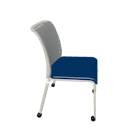

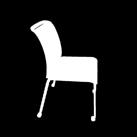

In [15]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])

### Example 2
Read lena.png in grayscale and shift the intensity values by 45 and visualize. 


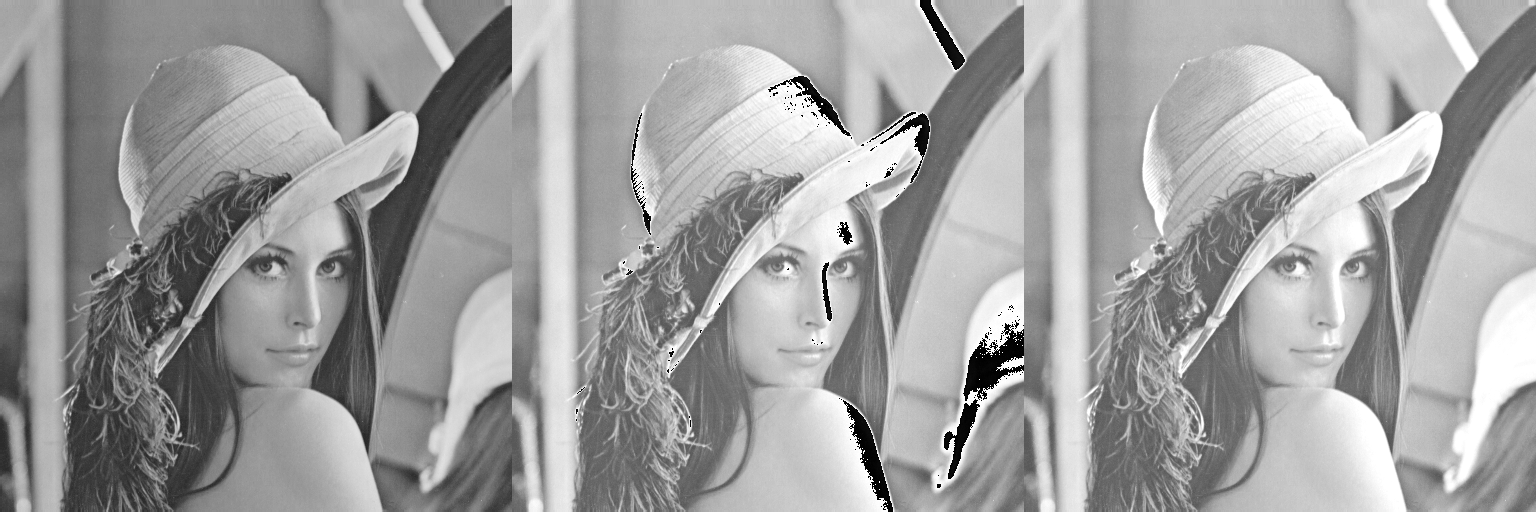

In [16]:
lena_bw = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)

linear_shift = 45
lena_shifted1 = lena_bw + linear_shift
I = lena_bw.astype('int')
lena_shifted = np.clip((I + linear_shift),0,255).astype('uint8')
cv2_imshow(np.hstack([I,lena_shifted1, lena_shifted]))

### HW
Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. \\
Use C = 1.

## Question 2
Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. Use C = 1.


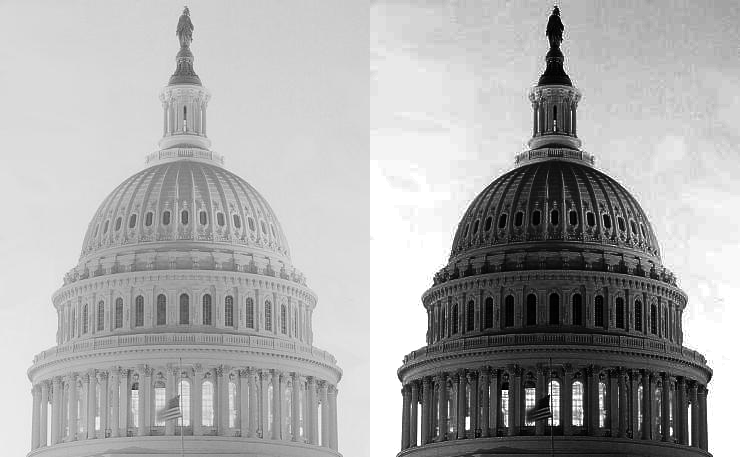

In [17]:
gamma_bw = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg', cv2.IMREAD_GRAYSCALE)
c=2
gamma=5 # Change gamma value here
temp = gamma_bw.astype('float')/255
transformed = c * np.clip(pow(temp,gamma),0,255) 
final = np.clip(transformed*255,0,255) 
cv2_imshow(np.hstack([gamma_bw,final]))

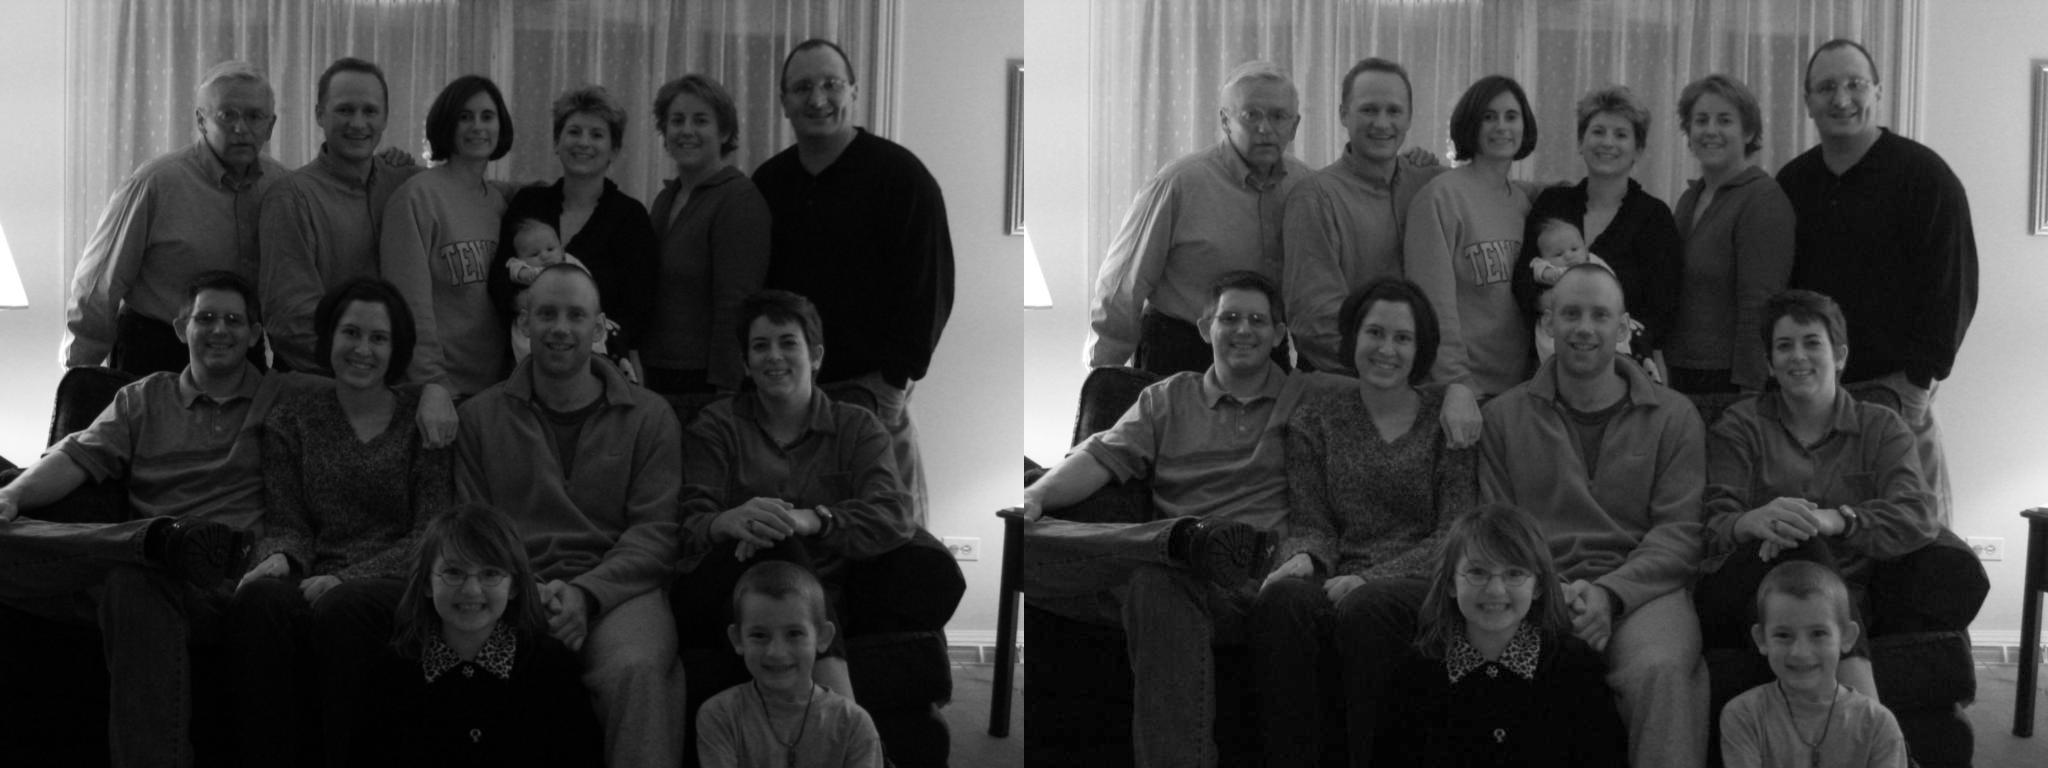

In [18]:
gamma_bw = cv2.imread('/content/drive/My Drive/Image Processing/gamma2.jpg', cv2.IMREAD_GRAYSCALE)
c=1
gamma=0.75 # Change gamma value here
temp = gamma_bw.astype('float')/255
transformed = c * np.clip(pow(temp,gamma),0,255) 
final = np.clip(transformed*255,0,255) 
final.astype('uint8')
cv2_imshow(np.hstack([gamma_bw,final]))

### Example 3
Write a program to read and plot histogram for a grayscale image.

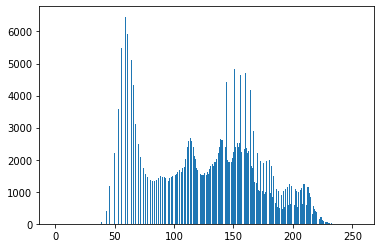

In [19]:
def plothist(img):
  count = np.zeros(256)
  for i in img:
    for j in i:
      count[int(j)] +=1
  plt.bar(x=np.arange(256),height=count)
plothist(lena_bw)

### HW
Plot histogram for RGB images ‘lotus.jpg’. You can use inbuilt functions for that. All RGB channels should be plotted in the same curve as shown below:

## Question 1
Plot histogram for RGB images ‘lotus.jpg’. You can use inbuilt functions for that. All RGB channels should be plotted in the same curve. Create a function for this so that it can be used later also.


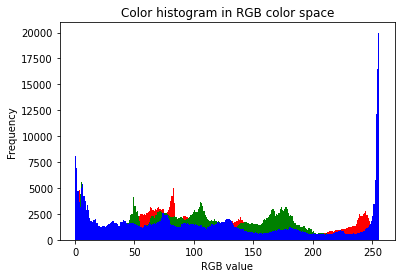

In [57]:
lotus = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')
def plotHistRGB(I):
  color = ('r','g','b')
  for i,col in enumerate(color):
      plt.hist(I[:,:,i].ravel(),256,[0,256],color = col)
  plt.title('Color histogram in RGB color space')
  plt.ylabel('Frequency')
  plt.xlabel('RGB value')
plotHistRGB(lotus)

### Example 4
Perform simple thresholding on the image ‘FingerPrint.jpg’. \\
Plot the histogram and observe the threshold value. \\
You can use an inbuilt function for thresholding.


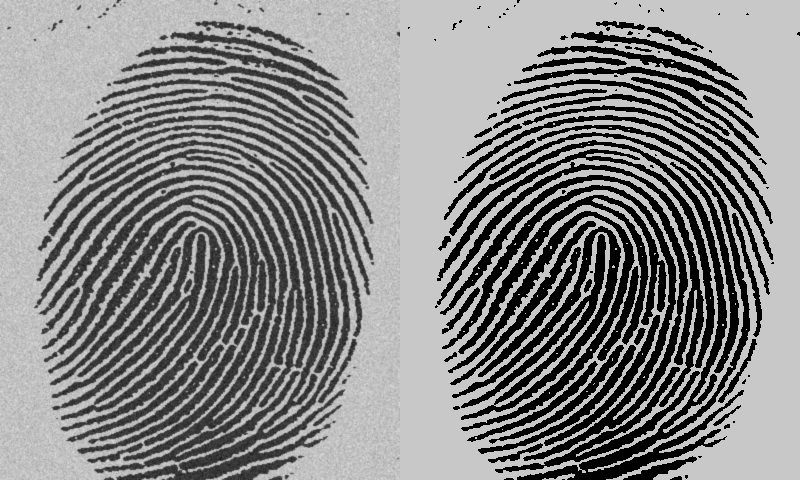

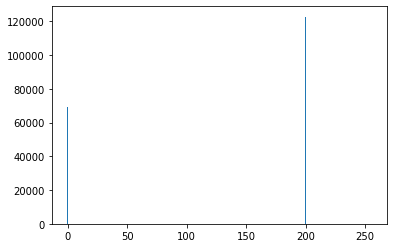

In [51]:
img = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE) 
ret,threshold = cv2.threshold(img , 100, 200 , cv2.THRESH_BINARY)
cv2_imshow(np.hstack([img,threshold]))
# plothist(img)
plothist(threshold)

Perform simple thresholding on the image ‘sudoku.jpeg’ in grayscale. \\
Plot the histogram and observe the threshold value. \\
You can use an inbuilt function for thresholding.


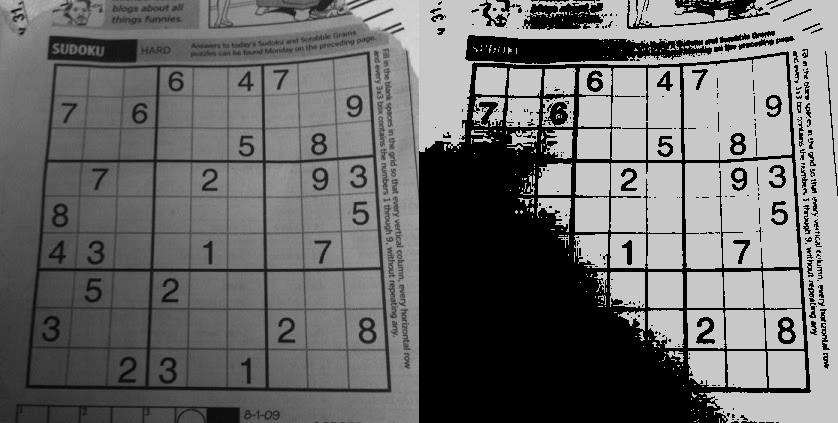

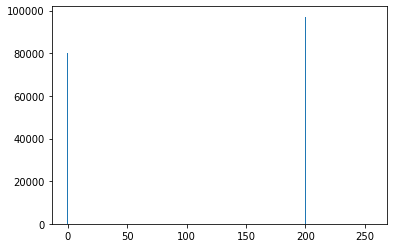

In [56]:
img = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE) 
ret,threshold = cv2.threshold(img , 100, 200 , cv2.THRESH_BINARY)
cv2_imshow(np.hstack([img,threshold]))
# plothist(img)
plothist(threshold)

### Example 5
Write a function which takes an image section and filter as an input and gives the convolution output. Take the filter to be- np.array([[1,1,1],[1,1,1],[1,1,1]])/9

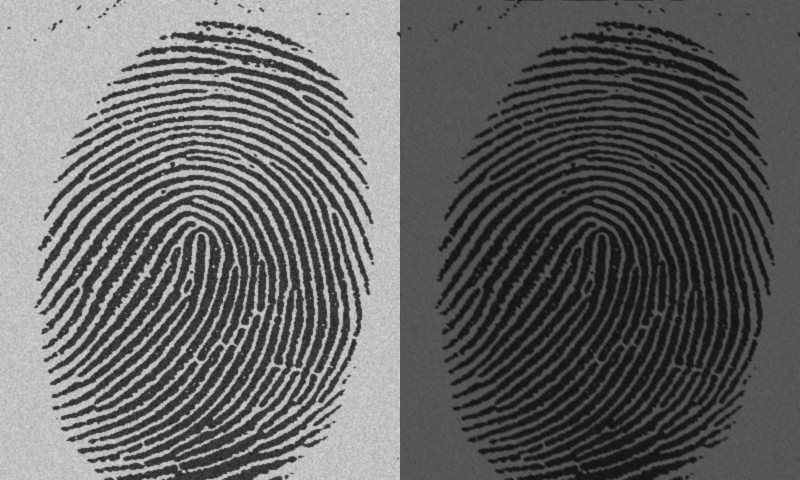

In [22]:
def convolute(img,mask):
  ret_img=np.zeros(img.shape)
  for u in range(img.shape[0]):
    for v in range(img.shape[1]):
      for i in range(-1,1):
        for j in range(-1,1):
          ret_img[u][v] += img[u+i][v+i] * mask[i][j]
  return ret_img
mask = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
cv2_imshow(np.hstack([img,convolute(img,mask)]))

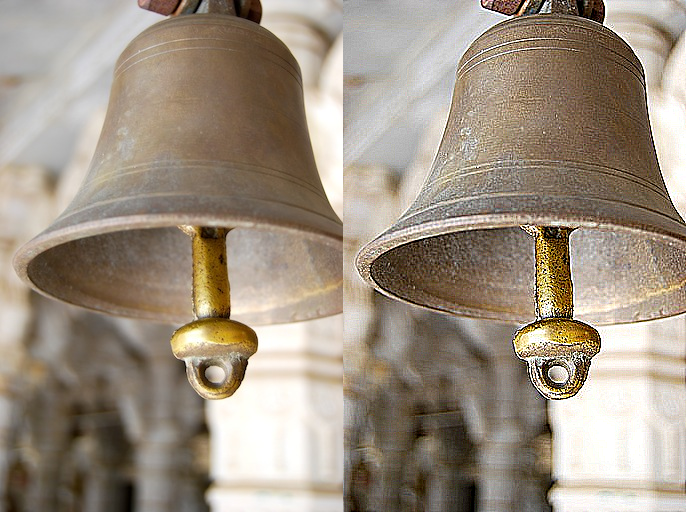

In [55]:
img = cv2.imread('/content/drive/My Drive/Image Processing/bell.jpg') 
sharpen = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharp_image = cv2.filter2D(img,-1,sharpen)
cv2_imshow(np.hstack([img,sharp_image]))

## Question 3
Perform thresholding on the image ‘text.jpg’


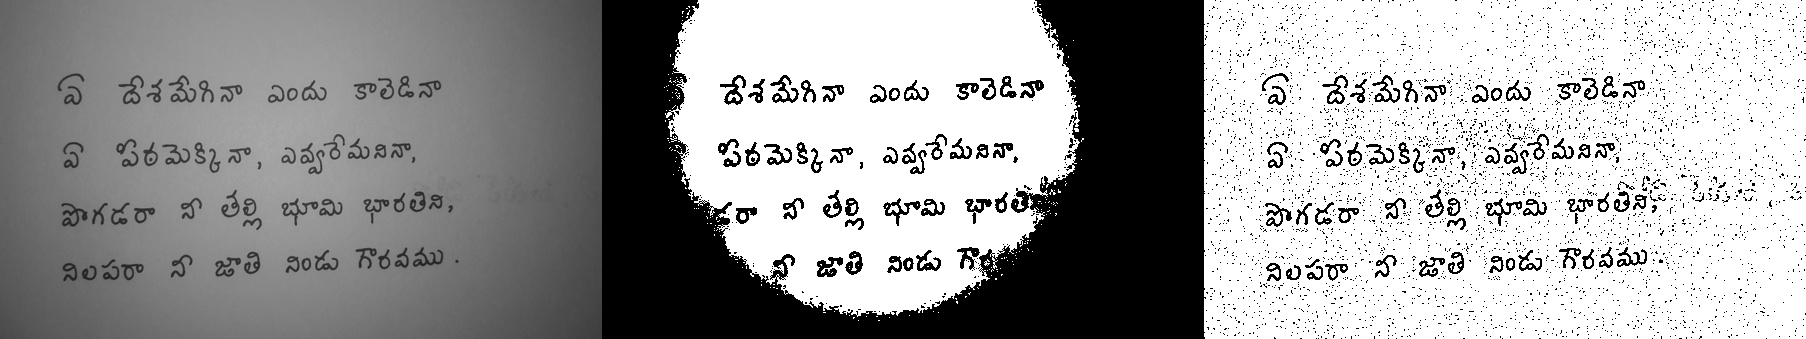

In [72]:
text = cv2.imread('/content/drive/My Drive/Image Processing/text.jpg', cv2.IMREAD_GRAYSCALE)
ret, threshold = cv2.threshold(text , 127, 255 , cv2.THRESH_BINARY)
adaptiveThreshold = cv2.adaptiveThreshold(text,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
cv2_imshow(np.hstack([text,threshold, adaptiveThreshold]))

### Example 6
Count the number of windows in image 'window.jpeg' using edge detection filters.

## Question 4
Count the number of windows in image 'window.jpeg' using edge detection filters.

Sobel operator along x
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
9.0
Sobel operator along y
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
13.0
Total Number of Windows =  140.0


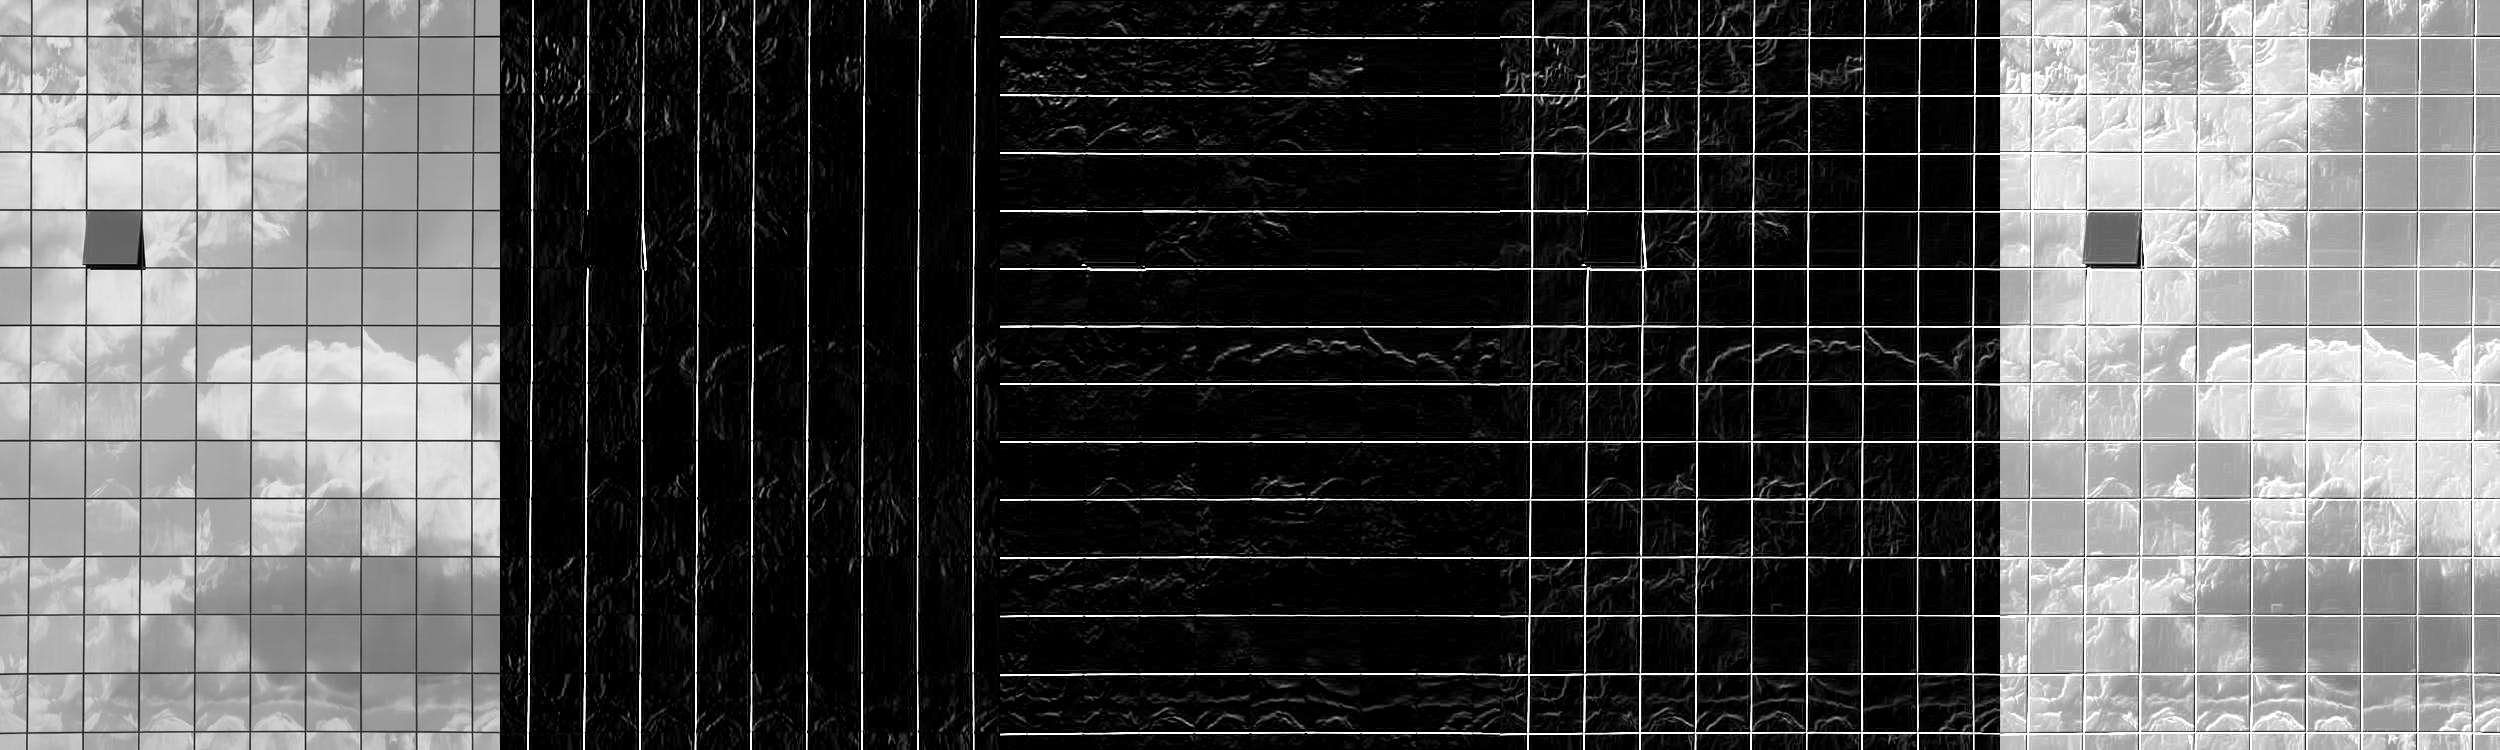

In [24]:
I = cv2.imread('/content/drive/My Drive/Image Processing/window.jpeg', cv2.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print ('Sobel operator along x')
print (sobel_x)
filtered_image1 = cv2.filter2D(I,-1,sobel_x)
ret,threshold = cv2.threshold(filtered_image1 , 127, 255 , cv2.THRESH_BINARY)
count=0

for j in range(threshold.shape[1]):
  if threshold[0][j] != threshold[0][j-1]:
    count+=1
print(count/2)

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print ('Sobel operator along y')
print (sobel_y)
filtered_image2 = cv2.filter2D(I,-1,sobel_y)
ret,threshold = cv2.threshold(filtered_image2 , 127, 255 , cv2.THRESH_BINARY)
count1=0
for j in range(threshold.shape[0]):
  if threshold[j][0] != threshold[j-1][0]:
    count1+=1
print(count1/2)

print("Total Number of Windows = " ,(count1/2 + 1) * (count/2 + 1))
magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
final = np.clip((I + magnitude),0,255).astype('uint8')
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2, magnitude, final]))